In [7]:
# ! sh parse_butterfly.sh

Archive:  Published -20210112T164653Z-001.zip
  inflating: butterfly/Published /Consolidation/Subpleural consolidation.png  
  inflating: butterfly/Published /Normal Lung/Normal Lung_Example 2.mp4  
  inflating: butterfly/Published /Irregular Pleural Line/Irregular Pleura with Confluent B-lines.mp4  
  inflating: butterfly/Published /B lines/Coalescing B lines.mp4  
  inflating: butterfly/Published /Irregular Pleural Line/Irregular Pleura3.mp4  
  inflating: butterfly/Published /Irregular Pleural Line/Irregular Pleural Line.mp4  
  inflating: butterfly/Published /B lines/Merged B-Lines with spared areas.mp4  
  inflating: butterfly/Published /Other/Small pleural effusion(1).mp4  
  inflating: butterfly/Published /Other/Small pleural effusion.mp4  
  inflating: butterfly/Published /B lines/Merged B-lines with _White Lung_.mp4  
  inflating: butterfly/Published /B lines/B lines.mp4  
  inflating: butterfly/Published /Cardiac Manifestations/Subcostal cardiac view, no effusion, hyperdynami

In [8]:
#! rm -rf butterfly
#! rm -rf cross_validation
#! rm -rf image_dataset

## Unzip the original files
This will give you the original files that did not processed.


In [9]:
%pwd

'/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data'

In [11]:
import zipfile
from tqdm import tqdm

with zipfile.ZipFile("/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published -20210112T164653Z-001.zip") as a:
    for file in tqdm(iterable = a.namelist(), total = len(a.namelist())):
        a.extract(member = file)

100%|██████████| 36/36 [00:00<00:00, 102.10it/s]


## Butterfly Data Processing

In [73]:
import cv2
import torch
import os
import random
import math
import glob 
import pathlib
import csv, PIL
import time, zipfile
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from tqdm import tqdm
from PIL import Image
from os import listdir
from torchvision import*

%matplotlib inline

In [33]:
basepath = '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data'
print(os.listdir(basepath +'/Published/'))

['Consolidation', 'Normal Lung', 'Irregular Pleural Line', 'B lines', 'Other', 'Cardiac Manifestations']


In [32]:
data_dir = basepath + '/Published'
train_img  =  glob.glob(data_dir+os.sep+"/*/*")

print(f"The total number of the Data: {len(train_img)}")
train_img[:5]

The total number of the Data: 36


['/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Subpleural consolidation.png',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Consolidation_Example 5.mp4',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Subpleural consolidation.mp4',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Consolidation_Example 2.mp4',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Consolidation_Example 4.mp4']

## 01 Video - Shutil
Make a directory before apply shutil function.

In [34]:
path = basepath + "/data_sets"
try: 
    os.mkdir(path) 
except OSError as error: 
    print(error)  

In [45]:
directory = "B-line", "Effusion" , "Consolidation", "Normal"
directory

('B-line', 'Effusion', 'Consolidation', 'Normal')

In [49]:
subpath = []

for i in directory:
    subpath.append(path + "/" + i)
    
subpath # this will be used for shutil destination

['/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/data_sets/B-line',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/data_sets/Effusion',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/data_sets/Consolidation',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/data_sets/Normal']

In [60]:
for folders in subpath:
    os.mkdir(folders)
    
print(os.listdir(path +'/'))

['B-line', 'Effusion', 'Consolidation', 'Normal']


In [63]:
subpath[2]

'/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/data_sets/Consolidation'

#### 01 Butterfly Consolidation


In [71]:
cons_img  =  glob.glob(data_dir+os.sep+"Consolidation/*")
cons_img[:]

['/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Subpleural consolidation.png',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Consolidation_Example 5.mp4',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Subpleural consolidation.mp4',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Consolidation_Example 2.mp4',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Consolidation_Example 4.mp4',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Consolidation_Example 3.mp4',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Consolidation.mp4',
 '/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/Published/Consolidation/Subpleural Basal Consolidation.mp4',
 '/home/S

In [74]:
files = cons_img
dest_dir3 = subpath[2]

for j in files:
    if os.path.isfile(j):
        shutil.move(j, dest_dir3)

Newdir3 = glob.glob(dest_dir3+os.sep+"/*")
print('{} files are copied'.format(len(Newdir3)))

10 files are copied


#### 02 Butterfly B-line

In [76]:
bline_img  =  glob.glob(data_dir+os.sep+"B lines/*")

for i in bline_img:
    if os.path.isfile(i):
        shutil.move(i, subpath[1])

checker = glob.glob(subpath[1]+os.sep+"/*")
print('{} files are copied'.format(len(checker)))

8 files are copied


#### 03 Butterfly normal

In [78]:
subpath[3]

'/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/data_sets/Normal'

In [80]:
norm_img  =  glob.glob(data_dir+os.sep+"Normal Lung/*")

for i in norm_img:
    if os.path.isfile(i):
        shutil.move(i, subpath[3])
        
checker = glob.glob(subpath[3]+os.sep+"/*")
print('{} files are copied'.format(len(checker)))

2 files are copied


#### 04 Effusion

In [81]:
butter_df = pd.read_csv('/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/butterfly_csv.csv')
butter_df.head()

,Current location,Filename,Label,Effusion,Consolidations,B-lines,Healthy
0,butterfly,Cov-Butterfly-COVID Lung 2,COVID-19,1,0,1,0
1,butterfly,Cov-Butterfly-Skip Lesion,COVID-19,0,1,1,0
2,butterfly,Cov-Butterfly-Confluent B lines,COVID-19,0,0,1,0
3,butterfly,Reg-Butterfly-Normal Lung A lines,regular,0,0,0,1
4,butterfly,Reg-Butterfly-Normal Lung_Example 2,regular,0,0,0,1


Healthy
0    17
1     3
dtype: int64

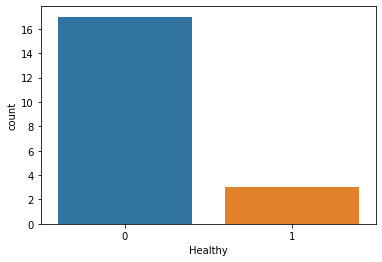

In [86]:
sns.countplot(x = 'Healthy', data=butter_df)
butter_df.value_counts('Healthy')

Effusion
0    19
1     1
dtype: int64

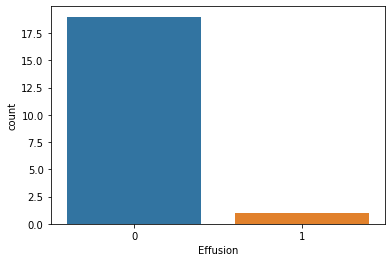

In [85]:
sns.countplot(x = 'Effusion', data=butter_df)
butter_df.value_counts('Effusion')

In [96]:
columns = ["Filename", "Effusion"]
eff_img = butter_df.reindex(columns=columns)
eff_img

,Filename,Effusion
0,Cov-Butterfly-COVID Lung 2,1
1,Cov-Butterfly-Skip Lesion,0
2,Cov-Butterfly-Confluent B lines,0
3,Reg-Butterfly-Normal Lung A lines,0
4,Reg-Butterfly-Normal Lung_Example 2,0
5,Cov-Butterfly-Coalescing B lines,0
6,Subpleural Basal Consolidation_Example 2,0
7,Cov-Butterfly-Consolidation with Air Bronchograms,0
8,Cov-Butterfly-Consolidation,0
9,Cov-Butterfly-Consolidation_Example 2,0


In [104]:
eff_i = eff_img.Filename.tolist()
eff_i[:1]

['Cov-Butterfly-COVID Lung 2']

In [118]:
Effusion_img  =  glob.glob(data_dir+os.sep+"/Other/*" )

for i in Effusion_img:
    if os.path.isfile(i):
        shutil.move(i, subpath[1])
        
checker = glob.glob(subpath[1]+os.sep+"/*")
print('{} files are copied'.format(len(checker)))

4 files are copied


#### 05 Total Video

In [121]:
path

'/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/data_sets'

In [125]:
total_img  =  glob.glob(path+os.sep+"/*/*")
print("The Total", len(total_img), "Videos have been moved.")

The Total 24 Videos have been moved.


## 02 Jpg, PNG - Shutil


In [130]:
pocovid_df = pd.read_csv('/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/meta_data.csv')
pocovid_df.head()

,Current_location,Filename,Label,Effusion,Consolidations,B-lines,Healthy
0,pocus_videos/Convex,Cov-Atlas+(44),COVID-19,0,1,0,0
1,pocus_videos/Convex,Cov-Atlas-Day+2,COVID-19,1,1,1,0
2,pocus_videos/Convex,Cov-Atlas-Day+4,COVID-19,1,1,0,0
3,pocus_videos/Convex,Pneu-Atlas-pneumonia,Bacterial pneumonia,1,1,1,0
4,pocus_videos/Convex,Reg-Atlas-lungcurtain,regular,0,0,0,1


In [131]:
%pwd

'/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data'

In [132]:
pocovid_df['image_path'] = f'/home/Sean/PoCOVID/4real/covid19_pocus_ultrasound_pytorch/code/data/' + pocovid_df.Current_location + '/' + pocovid_df.Filename
pocovid_df.head()

,Current_location,Filename,Label,Effusion,Consolidations,B-lines,Healthy,image_path
0,pocus_videos/Convex,Cov-Atlas+(44),COVID-19,0,1,0,0,/home/Sean/PoCOVID/4real/covid19_pocus_ultraso...
1,pocus_videos/Convex,Cov-Atlas-Day+2,COVID-19,1,1,1,0,/home/Sean/PoCOVID/4real/covid19_pocus_ultraso...
2,pocus_videos/Convex,Cov-Atlas-Day+4,COVID-19,1,1,0,0,/home/Sean/PoCOVID/4real/covid19_pocus_ultraso...
3,pocus_videos/Convex,Pneu-Atlas-pneumonia,Bacterial pneumonia,1,1,1,0,/home/Sean/PoCOVID/4real/covid19_pocus_ultraso...
4,pocus_videos/Convex,Reg-Atlas-lungcurtain,regular,0,0,0,1,/home/Sean/PoCOVID/4real/covid19_pocus_ultraso...


In [137]:
Effusion_df = pocovid_df[['image_path', 'Effusion']]
Effusion_df[:2]

,image_path,Effusion
0,/home/Sean/PoCOVID/4real/covid19_pocus_ultraso...,0
1,/home/Sean/PoCOVID/4real/covid19_pocus_ultraso...,1


Effusion
0    173
1     35
dtype: int64

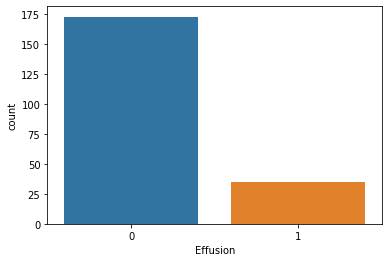

In [138]:
sns.countplot(x = 'Effusion', data=Effusion_df)
Effusion_df.value_counts('Effusion')